# Predicting wheather a person will continue the sevice or not(Classification problem)

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import  warnings
warnings.filterwarnings(action='ignore')

# Reading File

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Basic Operations

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.sample()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7762,7763,15808780,Tien,850,France,Female,34,2,0.0,2,0,0,51919.04,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Droping unwanted column

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace =True)  

# Visualization

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].max()

92

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

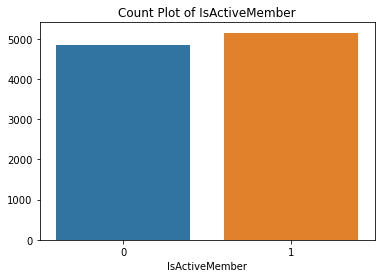

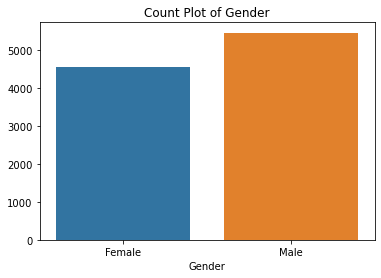

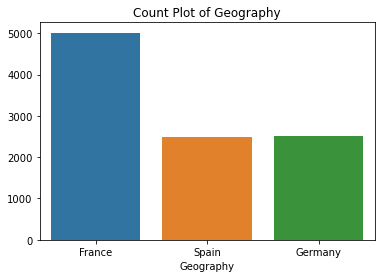

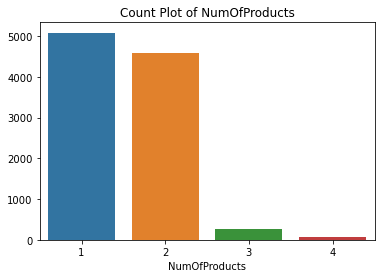

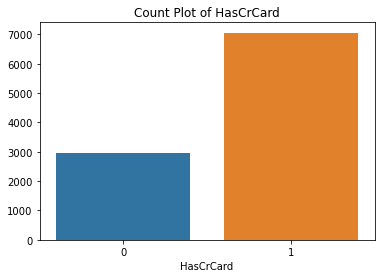

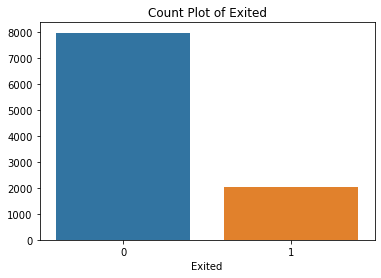

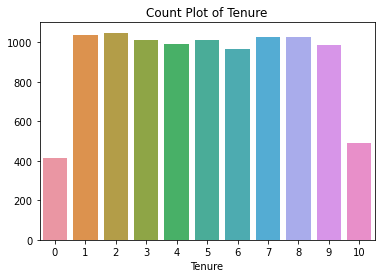

In [ ]:
cat_col=['IsActiveMember','Gender','Geography','NumOfProducts','HasCrCard','Exited','Tenure']
for i in cat_col:
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Count Plot of ' + i)
    plt.show()

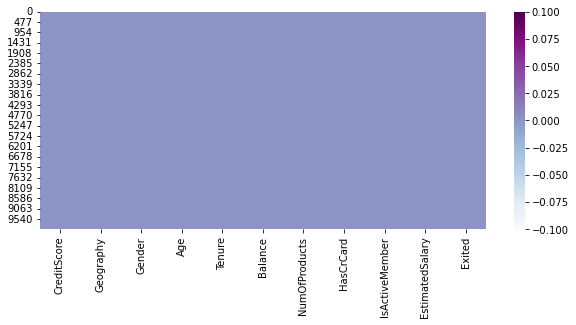

In [ ]:
plt.figure(figsize=(10,4))
_=sns.heatmap(df.isna(),cbar=True,cmap='BuPu')

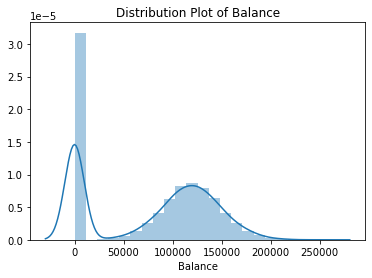

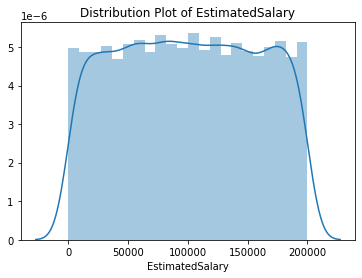

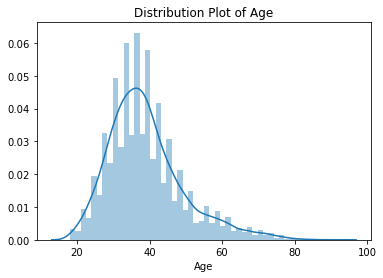

In [ ]:
num_col=['Balance','EstimatedSalary','Age']
for i in num_col:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Distribution Plot of ' + i)
    plt.show()

Text(0.5, 1.0, 'Box Plot of Age column')

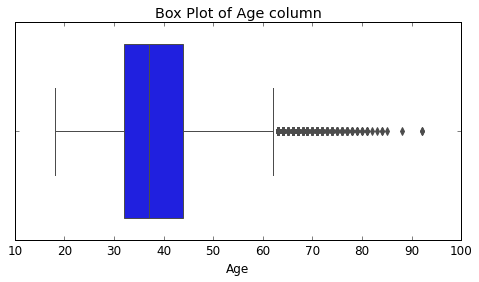

In [ ]:
plt.figure(figsize=(8,4))
plt.style.use('classic')
_=sns.boxplot('Age',data=df)
plt.title('Box Plot of Age column')

Text(0.5, 1.0, 'Corelation Heatmap')

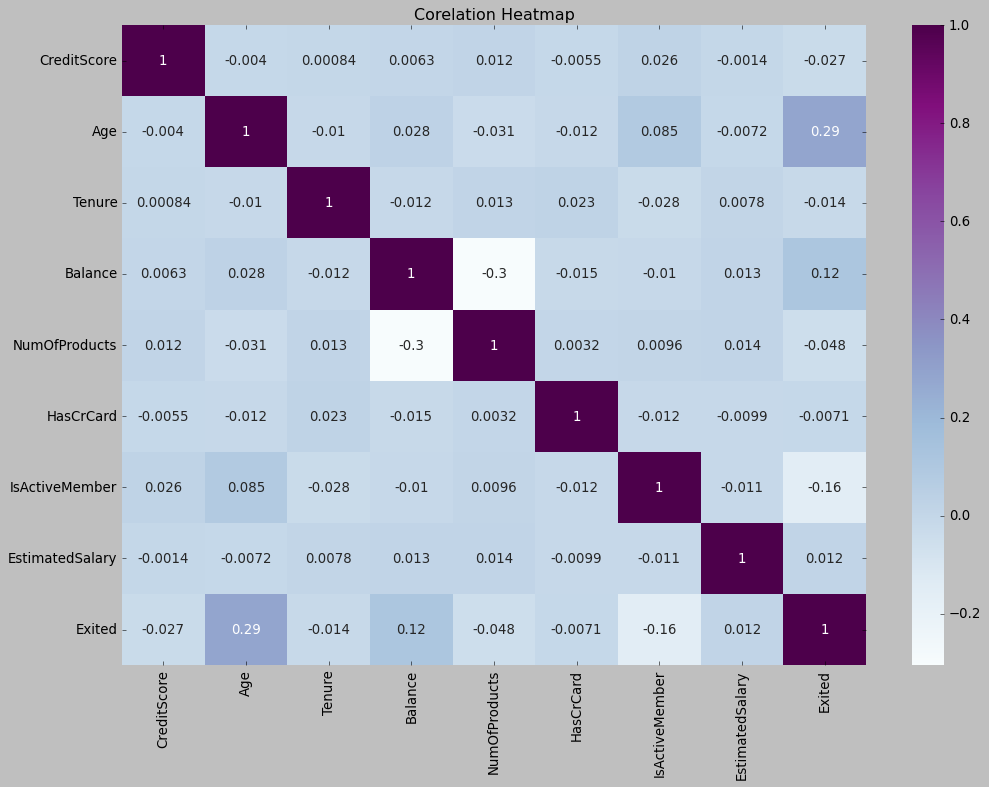

In [ ]:
plt.figure(figsize=(15,10))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap')

<AxesSubplot:ylabel='Gender'>

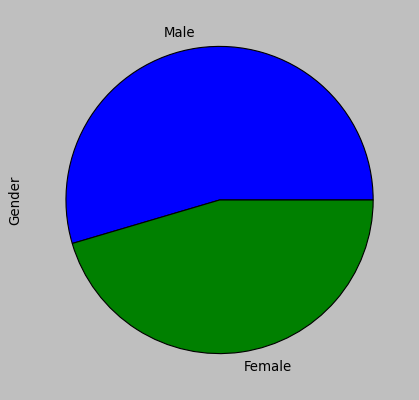

In [ ]:
df['Gender'].value_counts().plot.pie()

<AxesSubplot:ylabel='Tenure'>

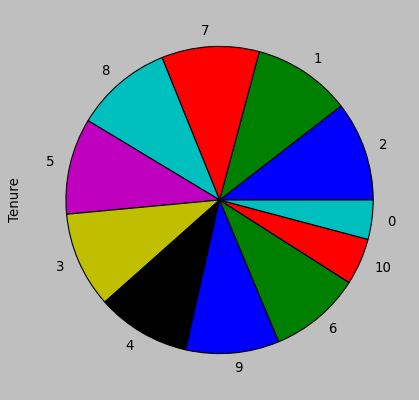

In [ ]:
df['Tenure'].value_counts().plot.pie()

# Catagorical to Numerical

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [ ]:
df.shape

(10000, 12)

Text(0.5, 1.0, 'Corelation Heatmap')

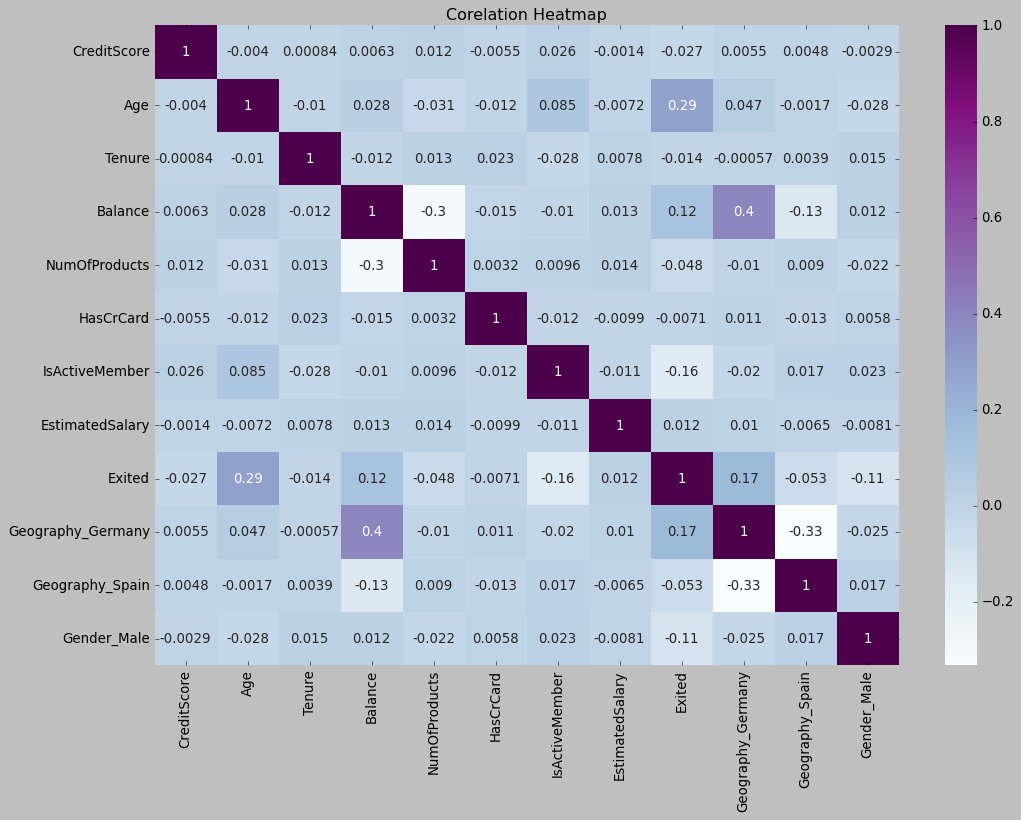

In [ ]:
plt.figure(figsize=(15,10))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap')

# Split in x and y

In [ ]:
x =df.drop(['Exited'],axis=1)
y = df['Exited']

In [ ]:
len(x.columns)

11

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# ANN

In [ ]:
# !pip install keras

In [ ]:
# !pip install tensorflow

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
keras.__version__

'2.9.0'

In [ ]:
# Initializing the ANN

In [ ]:
ann_clf=Sequential()

In [ ]:
# Adding input layer and first hidden layer
# to assign weights we use kernal initializer

In [ ]:
ann_clf.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

In [ ]:
# second hidden layer

In [ ]:
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [ ]:
# adding output layer

In [ ]:
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [ ]:
# Compiling the model

In [ ]:
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model Summary

In [ ]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [ ]:
ann_clf.fit(x_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
42/42 [==============================] - 2s 17ms/step - loss: 0.6847 - accuracy: 0.7954 - val_loss: 0.6723 - val_accuracy: 0.8064
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.7961 - val_loss: 0.6234 - val_accuracy: 0.8064
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.7961 - val_loss: 0.5382 - val_accuracy: 0.8064
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5064 - accuracy: 0.7961 - val_loss: 0.4739 - val_accuracy: 0.8064
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7961 - val_loss: 0.4492 - val_accuracy: 0.8064
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4502 - accuracy: 0.7961 - val_loss: 0.4405 - val_accuracy: 0.8064
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.7961 - val_loss: 0.4369 - val_accuracy: 0.8064
Epoch 8/100


# Predicting the test Result

In [ ]:
y_pred=ann_clf.predict(x_test)

250/250 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[0.23616403],
       [0.39729378],
       [0.19576658],
       ...,
       [0.08746243],
       [0.19143336],
       [0.2097449 ]], dtype=float32)

In [ ]:
y_pred=(y_pred>0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)
acc

0.8235

# Confusion Matrix

In [ ]:
con=confusion_matrix(y_test,y_pred)
con

array([[6039,  325],
       [1087,  549]], dtype=int64)